In [160]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
%matplotlib inline

In [161]:
from shapely.geometry import Polygon

In [162]:
from mpl_toolkits.basemap import Basemap



In [163]:
#import geopy

In [164]:
states = gpd.read_file('states.shp')

In [165]:
states.head()


,STATE_NAME,DRAWSEQ,STATE_FIPS,SUB_REGION,STATE_ABBR,geometry
0,Hawaii,1,15,Pacific,HI,"MULTIPOLYGON (((-160.07380 22.00418, -160.0497..."
1,Washington,2,53,Pacific,WA,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628..."
2,Montana,3,30,Mountain,MT,"POLYGON ((-111.47543 44.70216, -111.48080 44.6..."
3,Maine,4,23,New England,ME,"MULTIPOLYGON (((-69.77728 44.07415, -69.85993 ..."
4,North Dakota,5,38,West North Central,ND,"POLYGON ((-98.73044 45.93827, -99.00683 45.939..."


In [166]:
states.shape

(51, 6)

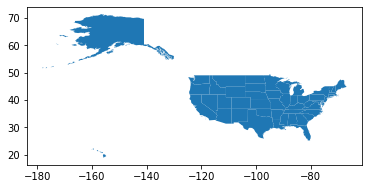

In [167]:
states.plot()

In [168]:
states[states.SUB_REGION == 'Pacific'].head()

,STATE_NAME,DRAWSEQ,STATE_FIPS,SUB_REGION,STATE_ABBR,geometry
0,Hawaii,1,15,Pacific,HI,"MULTIPOLYGON (((-160.07380 22.00418, -160.0497..."
1,Washington,2,53,Pacific,WA,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628..."
11,Oregon,12,41,Pacific,OR,"POLYGON ((-121.44151 41.99433, -122.28471 42.0..."
24,California,25,06,Pacific,CA,"MULTIPOLYGON (((-121.66522 38.16929, -121.7823..."
50,Alaska,51,02,Pacific,AK,"MULTIPOLYGON (((-161.33379 58.73325, -161.3824..."


In [169]:
states.head(8)

,STATE_NAME,DRAWSEQ,STATE_FIPS,SUB_REGION,STATE_ABBR,geometry
0,Hawaii,1,15,Pacific,HI,"MULTIPOLYGON (((-160.07380 22.00418, -160.0497..."
1,Washington,2,53,Pacific,WA,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628..."
2,Montana,3,30,Mountain,MT,"POLYGON ((-111.47543 44.70216, -111.48080 44.6..."
3,Maine,4,23,New England,ME,"MULTIPOLYGON (((-69.77728 44.07415, -69.85993 ..."
4,North Dakota,5,38,West North Central,ND,"POLYGON ((-98.73044 45.93827, -99.00683 45.939..."
5,South Dakota,6,46,West North Central,SD,"POLYGON ((-102.78838 42.99530, -103.00588 42.9..."
6,Wyoming,7,56,Mountain,WY,"POLYGON ((-104.05362 41.69822, -104.05550 41.5..."
7,Wisconsin,8,55,East North Central,WI,"MULTIPOLYGON (((-87.74856 44.96162, -87.83999 ..."


In [170]:
states.drop([0,50], axis=0, inplace=True)

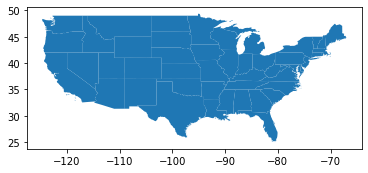

In [171]:
states.plot()

In [172]:
states = states.to_crs(epsg=5071)

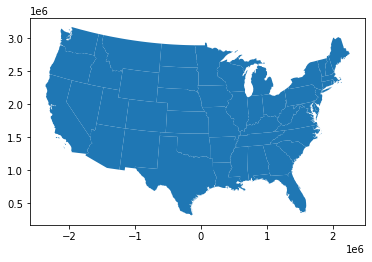

In [173]:
states.plot()

In [174]:
# coloring shape:
# 1 fill - inside part
# 2 stroke/line/edge -outline

In [175]:
bio = gpd.read_file('Biodiesel_Plants_US_20190101.shp')

In [176]:
bio.shape

(102, 9)

In [177]:
bio.head()

,Company,State,PADD,Period,Cap_Mmgal,Source,Longitude,Latitude,geometry
0,Hero BX Alabama LLC,Alabama,3,"As of Jan. 1, 2019",20,U.S. Biodiesel Plant Production Capacity (Form...,-87.6262,33.0093,POINT (-87.62620 33.00930)
1,Alaska Green Waste Solutions LLC,Alaska,5,"As of Jan. 1, 2019",Less than 0.5,U.S. Biodiesel Plant Production Capacity (Form...,-149.8607,61.1636,POINT (-149.86070 61.16360)
2,Grecycle Arizona LLC,Arizona,5,"As of Jan. 1, 2019",2,U.S. Biodiesel Plant Production Capacity (Form...,-110.8940,32.1099,POINT (-110.89400 32.10990)
3,Futurefuel Chemical Company,Arkansas,3,"As of Jan. 1, 2019",60,U.S. Biodiesel Plant Production Capacity (Form...,-91.5182,35.7258,POINT (-91.51820 35.72580)
4,Solfuels USA LLC,Arkansas,3,"As of Jan. 1, 2019",40,U.S. Biodiesel Plant Production Capacity (Form...,-90.5876,34.5163,POINT (-90.58760 34.51630)


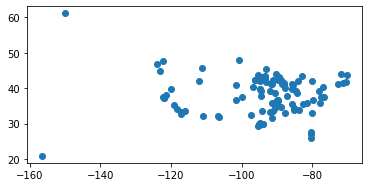

In [178]:
bio.plot()

In [179]:
bio['State'].value_counts()

Iowa              10
California        10
Missouri          10
Texas             10
Illinois           6
Virginia           4
Arkansas           3
Indiana            3
Florida            3
Mississippi        3
Georgia            3
North Carolina     3
Minnesota          3
Wisconsin          2
Tennessee          2
Nebraska           2
Pennsylvania       2
Michigan           2
Washington         2
North Dakota       1
Alabama            1
South Carolina     1
Hawaii             1
Alaska             1
Rhode Island       1
Oregon             1
Arizona            1
Oklahoma           1
Maine              1
Connecticut        1
Kentucky           1
Ohio               1
Montana            1
Utah               1
New Mexico         1
Massachusetts      1
New Hampshire      1
Kansas             1
Name: State, dtype: int64

In [180]:
bio.drop(bio[bio['State']=='Alaska'].index, inplace = True) 

In [181]:
bio['State'].value_counts()

Iowa              10
Texas             10
Missouri          10
California        10
Illinois           6
Virginia           4
Arkansas           3
North Carolina     3
Mississippi        3
Minnesota          3
Florida            3
Indiana            3
Georgia            3
Washington         2
Wisconsin          2
Pennsylvania       2
Michigan           2
Nebraska           2
Tennessee          2
Kentucky           1
Oregon             1
Arizona            1
Hawaii             1
Alabama            1
Maine              1
New Hampshire      1
Ohio               1
Montana            1
New Mexico         1
Connecticut        1
North Dakota       1
Massachusetts      1
Utah               1
Oklahoma           1
Rhode Island       1
South Carolina     1
Kansas             1
Name: State, dtype: int64

In [182]:
bio.drop(bio[bio['State']=='Hawaii'].index, inplace = True) 

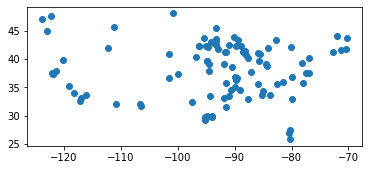

In [183]:
bio.plot()

In [184]:
bio = bio.to_crs(epsg=5071)

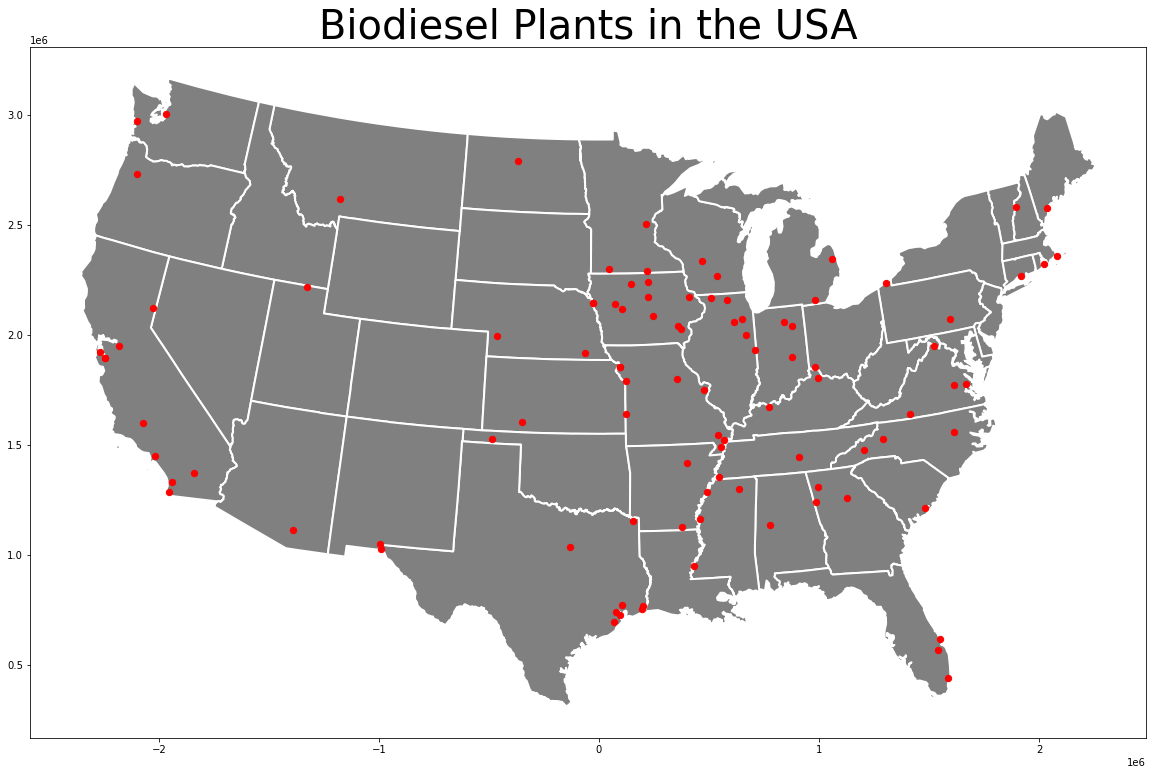

In [215]:
base = states.plot(figsize=(20,20), color='gray', edgecolor='white',linewidth=2)

fig = bio.plot(ax=base, figsize=(20,20), color='red', markersize=40)

plt.title('Biodiesel Plants in the USA', fontsize= 40)

plt.savefig('Biodeisel.png')


In [210]:
import PIL